#  Trabalhando com planilhas  do Excel

In [1]:
# Bibliotecas
import pandas as pd


In [2]:
#Leitura dos arquivos



df1 = pd.read_excel("datasets\Aracaju.xlsx", engine="openpyxl")
df2 = pd.read_excel("datasets\Fortaleza.xlsx", engine="openpyxl")
df4 = pd.read_excel("datasets\Recife.xlsx", engine="openpyxl")
df5 = pd.read_excel("datasets\Salvador.xlsx", engine="openpyxl")

In [3]:
#juntando dados



df = pd.concat([df1, df2, df4, df5])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#alterando o tipo de dado da coluna Lojaid
df["LojaID"] = df["LojaID"].astype("object")

In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

# Tratando valores faltantes

In [9]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

**Pontos importantes**

**substituindo os valores nulos pela média**
df["Vendas"].fillna9(["Vendas"]).mean(), inplace=True)

**Substituindo por 0**
df["Vendas"].fillna9(0,inplace=True)

**apagar valores nulos**
df.dropna(inplace=True)

**em apenas uma coluna**
df.dropna(subset=["Vendas"], inplace=True)


**Removendo linhas que estejam com valores faltantes em todas as colunas**
df.dropna(how= "all", inplace=True)

## Criando novas colunas

In [10]:


df["Receita"] = df["Vendas"].mul(df["Qtde"])



In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [12]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [14]:
new_var = df["Receita"].max()
new_var

1913.36

In [15]:
df["Receita"].min()

3.34

In [16]:
#Maior receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
46,Recife,2019-01-01,239.17,981,8,1913.36,8.0
41,Aracaju,2018-01-01,229.64,1520,8,1837.12,8.0
94,Aracaju,2018-01-01,198.24,1521,9,1784.16,9.0


In [17]:
#Menor receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0


In [18]:
#Agrupamento por cidade

df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju      48748.25
Fortaleza    37913.97
Recife       51936.51
Salvador     40596.73
Name: Receita, dtype: float64

In [19]:
#Ordenado o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
46,Recife,2019-01-01,239.17,981,8,1913.36,8.0
41,Aracaju,2018-01-01,229.64,1520,8,1837.12,8.0
94,Aracaju,2018-01-01,198.24,1521,9,1784.16,9.0
23,Aracaju,2018-01-01,237.50,1523,7,1662.50,7.0
31,Aracaju,2018-01-01,171.16,1520,9,1540.44,9.0
141,Recife,2019-03-02,182.75,983,8,1462.00,8.0
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,8.0
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,9.0
75,Aracaju,2018-01-01,160.64,1523,9,1445.76,9.0
19,Recife,2019-01-01,199.43,983,7,1396.01,7.0


## Trabalhando com Datas

In [20]:
#Transformando a colula data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [21]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [22]:
# Transformando coluna data(int) em data
df["Data"] = pd.to_datetime(df["Data"])

In [23]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [24]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018     46426.53
2019    132768.93
Name: Receita, dtype: float64

In [25]:
#Criando uma nova coluna com ano
df["Ano_vendas"] = df["Data"].dt.year

In [26]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_vendas
40,Recife,2019-02-13,36.22,983,6,217.32,6.0,2019
20,Salvador,2019-01-01,33.97,1034,3,101.91,3.0,2019
59,Fortaleza,2019-01-01,6.31,1002,3,18.93,3.0,2019
74,Aracaju,2018-01-01,7.86,1520,2,15.72,2.0,2018
130,Recife,2019-03-02,12.36,983,4,49.44,4.0,2019


In [27]:
# Extraindo o mês e o dia
df["mes_vendas"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [28]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_vendas,mes_vendas,dia_venda
29,Recife,2019-01-01,10.18,980,8,81.44,8.0,2019,1,1
13,Aracaju,2018-01-01,43.45,1522,10,434.50,10.0,2018,1,1
24,Recife,2019-01-01,13.00,983,2,26.00,2.0,2019,1,1
230,Salvador,2019-01-03,184.69,1036,1,184.69,1.0,2019,1,3
79,Aracaju,2018-01-01,5.59,1521,4,22.36,4.0,2018,1,1


In [29]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [30]:
#calcular diferença de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()


In [31]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_vendas,mes_vendas,dia_venda,Diferenca_dias
63,Fortaleza,2019-01-01,118.17,1004,1,118.17,1.0,2019,1,1,365 days
92,Fortaleza,2019-01-01,3.49,1005,4,13.96,4.0,2019,1,1,365 days
10,Fortaleza,2019-01-01,179.88,1002,4,719.52,4.0,2019,1,1,365 days
117,Recife,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days
122,Fortaleza,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2,425 days


In [32]:
#criando coluna com trimestre
df["Trimestre_vendas"] = df["Data"].dt.quarter

In [33]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [34]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_vendas,mes_vendas,dia_venda,Diferenca_dias,Trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualização de dados

In [35]:
df["LojaID"].value_counts(ascending=False)

1035    68
1036    68
983     65
1037    60
982     44
1034    44
1522    41
1520    39
980     36
981     31
1002    30
1005    30
1523    29
1004    28
1521    21
1003    20
Name: LojaID, dtype: int64

<AxesSubplot:>

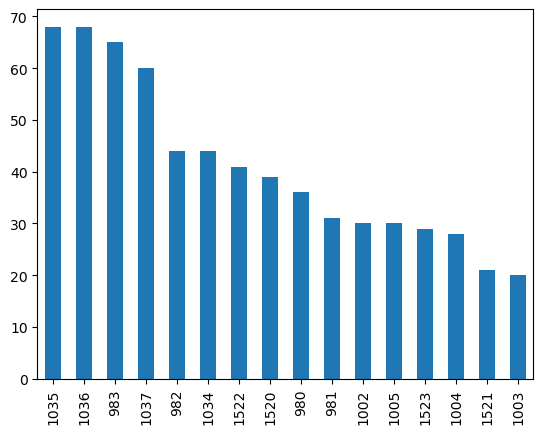

In [36]:
df["LojaID"].value_counts(ascending=False).plot.bar()

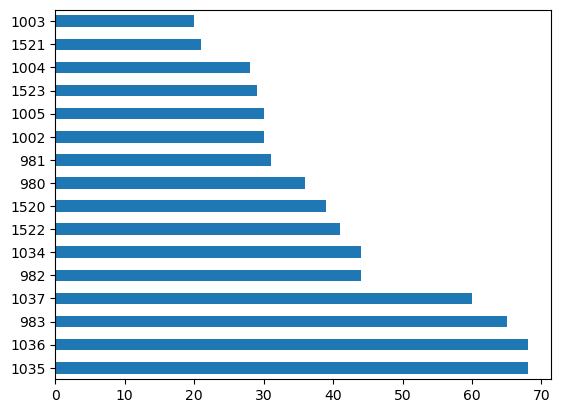

In [37]:
#Barra horizontal
df["LojaID"].value_counts(ascending=False).plot.barh();

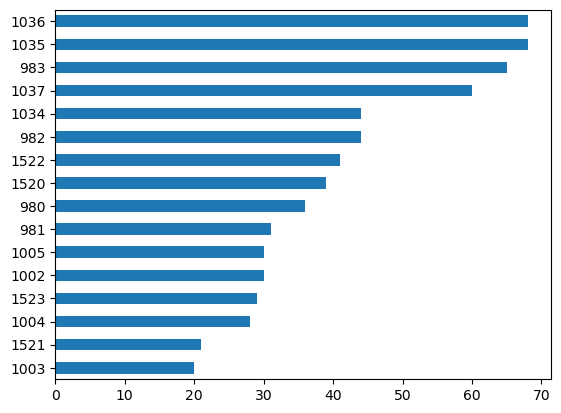

In [38]:
#Maior para o menor
df["LojaID"].value_counts(ascending=True).plot.barh();

<AxesSubplot:ylabel='Receita'>

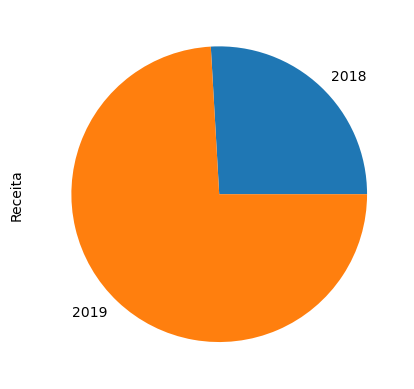

In [39]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [40]:
#Total vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

# Melhorando com matplotlib

In [41]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt

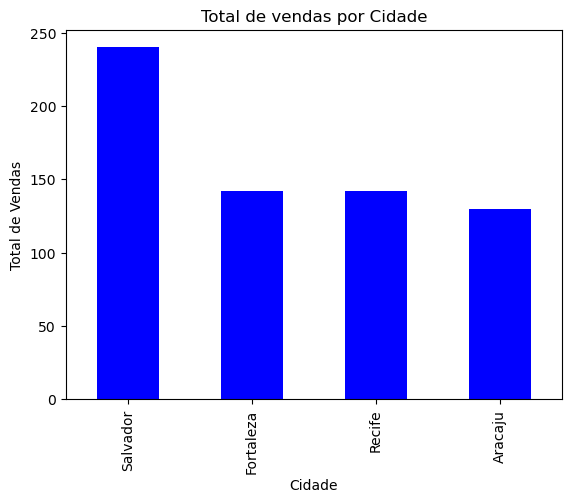

In [42]:



df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color='blue')
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

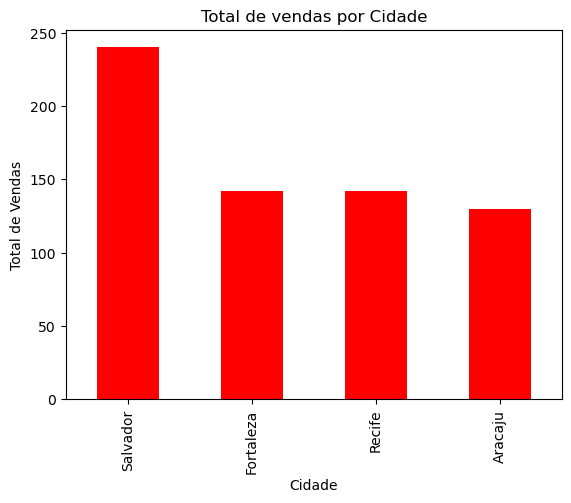

In [43]:
# Mudando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [44]:
#alterando o estilo
plt.style.use("ggplot")

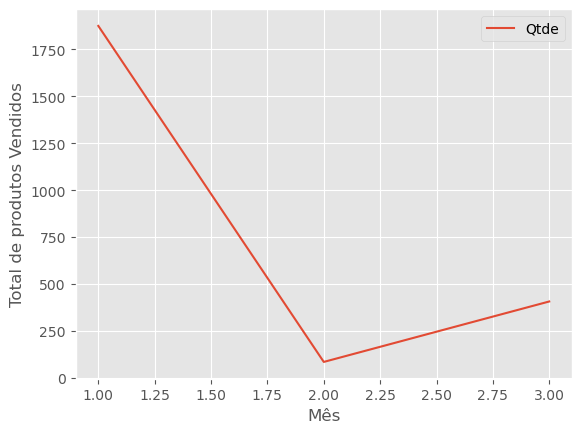

In [45]:
df.groupby(df["mes_vendas"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total de produtos Vendidos")
plt.legend();

In [46]:
df.groupby(df["mes_vendas"])["Qtde"].sum()

mes_vendas
1    1875
2      85
3     407
Name: Qtde, dtype: int64

In [48]:
df_2019 = df[df["Ano_vendas"] == 2019]

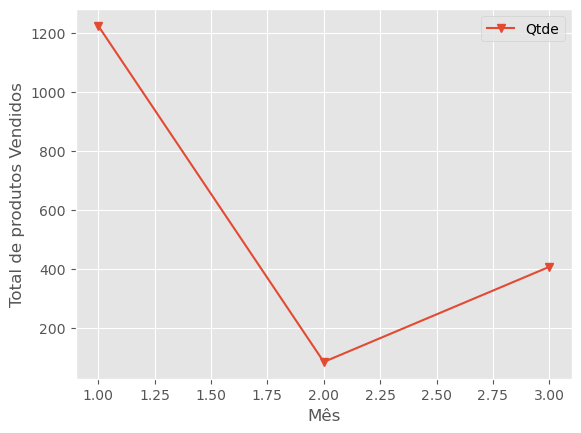

In [51]:
#Total produtos vendidos por Mês
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos Vendidos")
plt.legend();

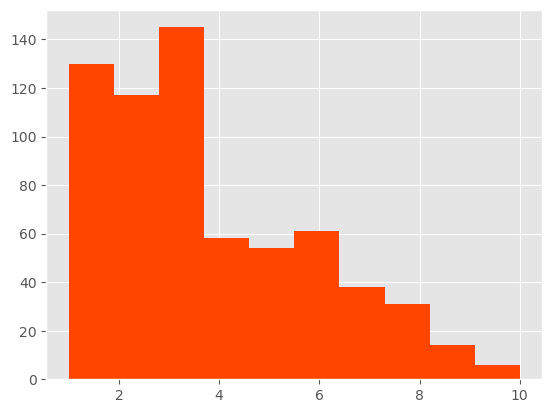

In [54]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

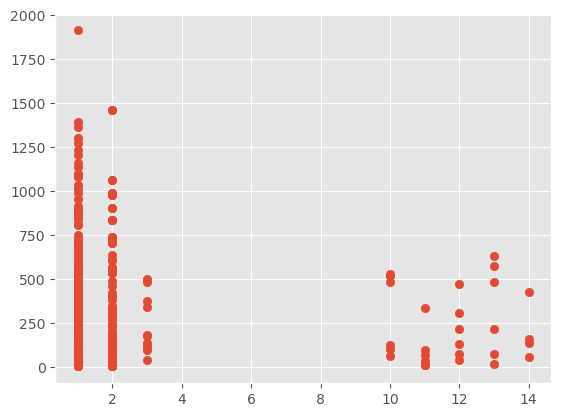

In [55]:
#Grafico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

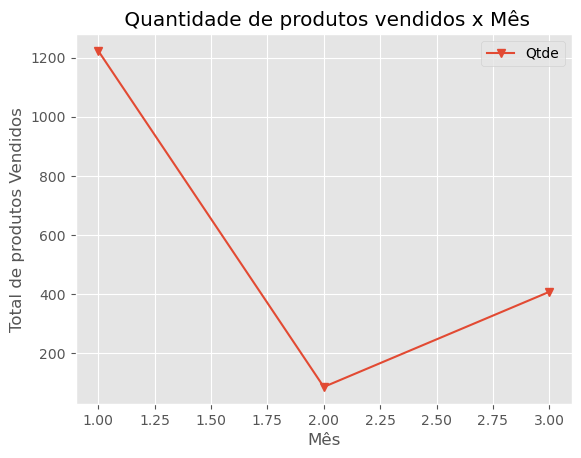

In [58]:
#Salvando em png
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(marker = "v")
plt.title(" Quantidade de produtos vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos Vendidos")
plt.legend()
plt.savefig("Grafico QTDE x MEM.png")
